In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
main_data = pd.read_csv('mu_users_skripsi.csv')

In [4]:
main_data.head()

,user_id,song_id,listen_cnt,song_name,artist_id,artist_name,album_id,album_name,genre_id,genre_name,domestic_yn,reg_date
0,82,120295320,469,1973 (Acoustic),170117,James Blunt,11574411,Wednesday,200010,Pop,N,2021-04-16 04:38:54.275724
1,82,118239146,44,3 3 4 1,11304674,Ami Sakaguchi,11223313,3 3 4 1,302010,Pop,N,2021-04-13 15:38:29.023604
2,82,118106976,322,Ainokatachi,11289562,Misia feat. HIDE (GReeeeN),11200927,Ainokatachi,302010,Pop,N,2021-04-13 14:46:21.017962
3,82,100007170,32,Akhirnya Ku Menemukanmu,10001719,Naff,10001010,Isyarat Hati,100010,Pop,Y,2021-04-17 06:03:55.163358
4,82,119898449,20,Aku Tanpamu,11323512,Maizura,11494994,Aku Tanpamu,100010,Pop,Y,2021-04-17 06:13:14.845606


In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
sns.set_style('white')

In [8]:
%matplotlib inline

In [9]:
main_data.groupby('song_name')['listen_cnt'].mean().sort_values(ascending=False).head()

song_name
Before You Go (Guitar Acoustic)    1647.00
The Last Time (Acoustic)           1597.00
It's You (Acoustic)                1558.00
Silhouette                         1475.00
To Die For (Acoustic)              1355.75
Name: listen_cnt, dtype: float64

In [10]:
main_data.groupby('song_name')['listen_cnt'].count().sort_values(ascending=False).head()

song_name
Bismillah Cinta    201
Sayang             162
Cidro 2            137
Hari Bahhagia      119
Isi Hati            94
Name: listen_cnt, dtype: int64

In [11]:
listens = pd.DataFrame(main_data.groupby('song_id')['listen_cnt'].mean())
listens.head()

,listen_cnt
song_id,
231134,35.0
231717,12.0
236441,24.0
237869,15.0
237870,16.0


In [12]:
listens['num of listen cnt'] = pd.DataFrame(main_data.groupby('song_id')['listen_cnt'].count())
listens.head()

,listen_cnt,num of listen cnt
song_id,,
231134,35.0,1
231717,12.0,1
236441,24.0,1
237869,15.0,2
237870,16.0,1


<AxesSubplot:>

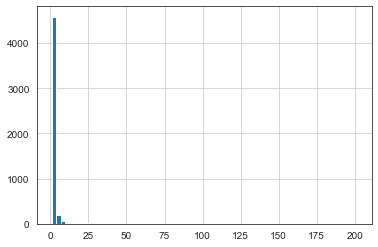

In [13]:
listens['num of listen cnt'].hist(bins=70)

<AxesSubplot:>

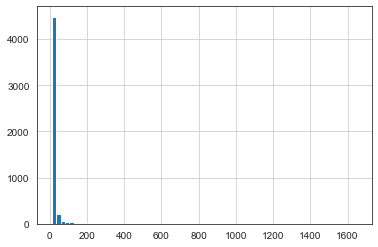

In [14]:
listens['listen_cnt'].hist(bins=70)

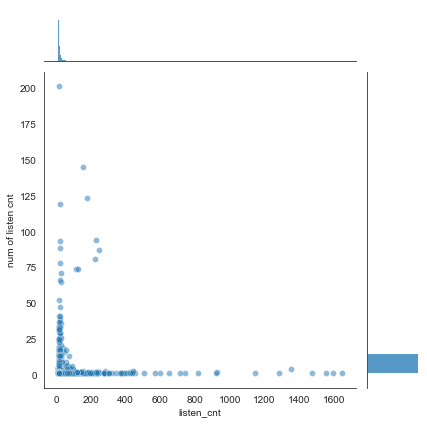

In [15]:
sns.jointplot(x='listen_cnt', y='num of listen cnt', data=listens, alpha=0.5)

In [16]:
listens.sort_values('num of listen cnt', ascending=False).head(10)

,listen_cnt,num of listen cnt
song_id,,
123620058,18.139303,201
123450668,151.124138,145
122998773,179.756098,123
123741938,19.352941,119
123250278,229.436170,94
122453498,20.763441,93
123742943,19.284091,88
123405308,246.114943,87
120384041,221.753086,81


In [17]:
n_user_id = main_data.user_id.nunique()
n_song_id = main_data.song_id.nunique()
print('Jumlah User: '+ str(n_user_id))
print('Jumlah Lagu: '+str(n_song_id))

Jumlah User: 3710
Jumlah Lagu: 4918


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_data, test_data = train_test_split(main_data, test_size=0.20, random_state = 0)

In [20]:
join_listen_train = train_data.pivot_table(index='user_id', columns='song_id', values='listen_cnt').fillna(0)
join_listen_train.head()

song_id,231717,236441,237869,237870,238468,273033,273034,273035,273036,273038,...,124133738,124137013,124150888,124150938,124151108,124151498,124151538,124167493,124197663,124197948
user_id,,,,,,,,,,,,,,,,,,,,,
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
841321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1422822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1754076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
join_listen_test = test_data.pivot_table(index='user_id', columns='song_id', values='listen_cnt').fillna(0)
join_listen_test.head()

song_id,231134,273032,273037,273044,332459,341512,354280,376253,382433,1279104,...,124039788,124039823,124040108,124040143,124040158,124107003,124132728,124133553,124137013,124197288
user_id,,,,,,,,,,,,,,,,,,,,,
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4565202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5280662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5412010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5460213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
def item_users(item):
    item_data = train_data[train_data['song_id'] == item]
    item_users = set(item_data['user_id'].unique())
    return item_users

In [23]:
def item_users_test(item):
    item_data = test_data[test_data['song_id'] == item]
    item_users = set(test_data['user_id'].unique())
    return item_users

In [24]:
def get_user_item(user):
    user_data = train_data[train_data['user_id'] == user]
    user_items = list(user_data['song_id'].unique())
    return user_items

In [25]:
def get_user_item_test(user):
    user_data = test_data[test_data['user_id'] == user]
    user_items = list(test_data['song_id'].unique())
    return user_items

In [26]:
def get_all_items_train_data():
    all_items = list(train_data['song_id'].unique())
    return all_items

In [27]:
def get_all_items_test_data():
    all_items = list(test_data['song_id'].unique())
    return all_items

In [28]:
def get_all_items_test_data():
    all_items = list(test_data['song_id'].unique())
    return all_items

In [29]:
def get_all_song_name_train():
    song_names_list = list(train_data['song_name'].unique())
    return song_names_list

In [30]:
def get_all_song_name_test():
    song_names_list = list(test_data['song_name'].unique())
    return song_names_list

In [31]:
def get_all_user_test_data():
    all_user = list(test_data['user_id'].unique())
    return all_user

In [32]:
def get_all_user_train_data():
    all_user = list(train_data['user_id'].unique())
    return all_user

In [33]:
def construct_cooccurence_matrix(user_songs, all_songs):

        ####################################
        # Get users for all songs in user_songs.
        ####################################
        user_songs_users = []
        for i in range(0, len(user_songs)):
            user_songs_users.append(item_users(user_songs[i]))

        ###############################################
        # Initialize the item cooccurence matrix of size
        # len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)

        #############################################################
        # Calculate similarity between user songs and all unique songs
        # in the training data
        #############################################################
        for i in range(0, len(all_songs)):
            # Calculate unique listeners (users) of song (item) i
            songs_i_data = train_data[train_data['song_id'] == all_songs[i]]
            users_i = set(songs_i_data['user_id'].unique())

            for j in range(0, len(user_songs)):

                # Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]

                # Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)

                # Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    # Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    cooccurence_matrix[j, i] = float(len(users_intersection)) / float(len(users_union))
                else:
                    cooccurence_matrix[j, i] = 0

        return cooccurence_matrix


In [34]:
def construct_cooccurence_matrix_test(user_songs, all_songs):

        ####################################
        # Get users for all songs in user_songs.
        ####################################
        user_songs_users = []
        for i in range(0, len(user_songs)):
            user_songs_users.append(item_users_test(user_songs[i]))

        ###############################################
        # Initialize the item cooccurence matrix of size
        # len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)

        #############################################################
        # Calculate similarity between user songs and all unique songs
        # in the training data
        #############################################################
        for i in range(0, len(all_songs)):
            # Calculate unique listeners (users) of song (item) i
            songs_i_data = test_data[test_data['song_id'] == all_songs[i]]
            users_i = set(songs_i_data['user_id'].unique())

            for j in range(0, len(user_songs)):

                # Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]

                # Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)

                # Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    # Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    cooccurence_matrix[j, i] = float(len(users_intersection)) / float(len(users_union))
                else:
                    cooccurence_matrix[j, i] = 0

        return cooccurence_matrix

In [35]:
def recomend(user):
    user_songs = get_user_item(user)
    print(user_songs)
    all_songss = get_all_items_train_data()
    print("no. of unique songs in the training set: %d" % len(all_songss))
    song_namess = get_all_song_name_train()
    cooccurence_matrix = construct_cooccurence_matrix(user_songs=user_songs, all_songs=all_songss)
    print(cooccurence_matrix)

In [36]:
def all_recomend():
    user_songs = get_all_user_train_data()
    print("No. of unique songs for the user: %d" % len(user_songs))
    all_songss = get_all_items_train_data()
    print("no. of unique songs in the training set: %d" % len(all_songss))
    song_namess = get_all_song_name_train()
    cooccurence_matrix = construct_cooccurence_matrix(user_songs=user_songs, all_songs=all_songss)
    user_similarity = pairwise_distances(cooccurence_matrix, metric='cosine')
    return user_similarity

In [38]:
recomend(44118002)

[123620058, 122994673, 100000099]
no. of unique songs in the training set: 4095
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [65]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
def recomend_user_similar(user):
    user_songs = get_user_item(user)
    print("unique songs for the user: %d" % len(user_songs))
    all_songss = get_all_items_train_data()
    print("unique songs in the training set: %d" % len(all_songss))
    cooccurence_matrix = construct_cooccurence_matrix(user_songs=user_songs, all_songs=all_songss)
    print(cooccurence_matrix)
    user_similarity = pairwise_distances(cooccurence_matrix, metric='cosine')
    user_cosine = cosine_similarity(cooccurence_matrix)
    print(len(user_similarity))
    return user_cosine

In [101]:
all_recomend()

No. of unique songs for the user: 3
no. of unique songs in the training set: 5


array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [66]:
recomend_user_similar(44118002)

unique songs for the user: 3
unique songs in the training set: 4095
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3


array([[1.        , 0.01418236, 0.01344797],
       [0.01418236, 1.        , 0.38461676],
       [0.01344797, 0.38461676, 1.        ]])

In [42]:
data_user_similar_score = recomend_user_similar(44118002)
print(data_user_similar_score)

unique songs for the user: 3
unique songs in the training set: 4095
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
3
[[0.         0.98581764 0.98655203]
 [0.98581764 0.         0.61538324]
 [0.98655203 0.61538324 0.        ]]


In [43]:
    import pandas

    def generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs, all_song_names):
        print("Jumlah Matrix :%d" % np.count_nonzero(cooccurence_matrix))

        # Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        print("PANJANG"+str(len(cooccurence_matrix)))
        user_sim_scores = np.array(cooccurence_matrix)[0].tolist()
        print(user_sim_scores)
        # Sort the indices of user_sim_scores based upon their value
        # Also maintain the corresponding score
        sort_index = sorted(((e, i) for i, e in enumerate(list(user_sim_scores))), reverse=True)

        # Create a dataframe from the following
        columns = ['user_id', 'song_id', 'song_name','accurate']
        # index = np.arange(1) # array of numbers for the number of samples
        df = pandas.DataFrame(columns=columns)

        # Fill the dataframe with top 10 item based recommendations
        rank = 1
        for i in range(0, len(sort_index)):

            if len(sort_index) > 1 and ~np.isnan(sort_index[i][0]) and sort_index[i][0] != 0.0 and all_songs[sort_index[i][1]] and all_song_names[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)] = [user, all_songs[sort_index[i][1]],all_song_names[sort_index[i][1]], sort_index[i][0]]
                rank = rank+1

        # Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df

In [67]:
def top_recomend(user):
    user_songs = get_user_item(user)
    print("Jumlah Lagu Untuk User: %d" % len(user_songs))
    print(user_songs)
    all_songss = get_all_items_train_data()
    print("Jumlah Lagu Yang Di Training: %d" % len(all_songss))
    all_song_name = get_all_song_name_train()
    cooccurence_matrix = construct_cooccurence_matrix(user_songs=user_songs, all_songs=all_songss)
    user_similarity = cosine_similarity(cooccurence_matrix)
    datas = generate_top_recommendations(user, user_similarity, all_songss, user_songs, all_song_name)
    return datas

In [68]:
top_recomend(44118002)

Jumlah Lagu Untuk User: 3
[123620058, 122994673, 100000099]
Jumlah Lagu Yang Di Training: 4095
Jumlah Matrix :9
PANJANG3
[0.9999999999999973, 0.014182355479128932, 0.013447967889331402]


,user_id,song_id,song_name,accurate
0,44118002,114469307,Children,1.000000
1,44118002,120299281,SurgaMu,0.014182
2,44118002,100006462,Bukan Pahlawan,0.013448


In [63]:
validation = train_data.groupby(['user_id'])
validation.get_group(24123475)

,user_id,song_id,listen_cnt,song_name,artist_id,artist_name,album_id,album_name,genre_id,genre_name,domestic_yn,reg_date
1691,24123475,120299291,11,Dia Maha Sempurna,10002460,Ungu,11578786,Top Hits Religi Ungu,100010,Pop,Y,2021-04-13 00:56:36.733178
1696,24123475,120299281,15,SurgaMu,10002460,Ungu,11578786,Top Hits Religi Ungu,100010,Pop,Y,2021-04-12 23:40:28.286697
1692,24123475,120299289,13,Hasbunallah,10002460,Ungu,11578786,Top Hits Religi Ungu,100010,Pop,Y,2021-04-12 23:49:26.168345
1688,24123475,120299279,12,Andai Ku Tahu,10002460,Ungu,11578786,Top Hits Religi Ungu,100010,Pop,Y,2021-04-13 00:56:27.922924
1695,24123475,120299290,12,Penghuni Surga Sejatimu,10002460,Ungu,11578786,Top Hits Religi Ungu,100010,Pop,Y,2021-04-13 00:56:31.488709
1697,24123475,120299284,16,Syukur (Alhamdulillah),10002460,Ungu,11578786,Top Hits Religi Ungu,100010,Pop,Y,2021-04-12 23:36:03.212571
1693,24123475,120299273,19,Jalan Panjangku,10002460,Ungu,11578786,Top Hits Religi Ungu,100010,Pop,Y,2021-04-12 23:26:51.441540
1694,24123475,120299283,17,Para Pencari Mu,10002460,Ungu,11578786,Top Hits Religi Ungu,100010,Pop,Y,2021-04-12 23:31:25.982114
1689,24123475,120299285,18,Bila Tiba,10002460,Ungu,11578786,Top Hits Religi Ungu,100010,Pop,Y,2021-04-12 23:44:41.269188


In [53]:
validation = train_data.groupby(['user_id'])
validation.get_group(38675228)

,user_id,song_id,listen_cnt,song_name,artist_id,artist_name,album_id,album_name,genre_id,genre_name,domestic_yn,reg_date
2995,38675228,100006462,29,Bukan Pahlawan,10002316,Superman Is Dead,10000031,Black Market Love,100030,Rock,Y,2021-04-19 03:26:09.604151
2994,38675228,1280735,15,Angels Cry,10002316,Superman Is Dead,87697,Kuta Rock City,100030,Rock,Y,2021-04-21 03:54:39.727725
2996,38675228,116089804,15,Munajat Cinta,10002332,The Rock,10864515,100Hits Indonesia,100030,Rock,Y,2021-04-20 09:35:09.897854


In [75]:
validation_song = train_data.groupby(['song_id'])
validation_song.get_group(123450668)

,user_id,song_id,listen_cnt,song_name,artist_id,artist_name,album_id,album_name,genre_id,genre_name,domestic_yn,reg_date
5357,62159392,123450668,347,Sayang,12079104,Alma Margana,14055364,Sayang,100010,Pop,Y,2021-04-12 12:51:22.418116
4535,58219720,123450668,11,Sayang,12079104,Alma Margana,14055364,Sayang,100010,Pop,Y,2021-04-12 17:36:44.878212
5333,62090517,123450668,333,Sayang,12079104,Alma Margana,14055364,Sayang,100010,Pop,Y,2021-04-12 16:34:09.371251
6607,65711482,123450668,197,Sayang,12079104,Alma Margana,14055364,Sayang,100010,Pop,Y,2021-04-12 15:29:05.828973
6121,64610080,123450668,641,Sayang,12079104,Alma Margana,14055364,Sayang,100010,Pop,Y,2021-04-12 12:37:35.739034
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,64557930,123450668,314,Sayang,12079104,Alma Margana,14055364,Sayang,100010,Pop,Y,2021-04-12 15:03:13.830895
6242,64758056,123450668,150,Sayang,12079104,Alma Margana,14055364,Sayang,100010,Pop,Y,2021-04-12 15:41:48.022559
7263,66577794,123450668,11,Sayang,12079104,Alma Margana,14055364,Sayang,100010,Pop,Y,2021-04-19 05:36:17.018753
8622,67603208,123450668,11,Sayang,12079104,Alma Margana,14055364,Sayang,100010,Pop,Y,2021-04-18 15:51:16.289767


In [77]:
validation_song = train_data.groupby(['song_id'])
validation_song.get_group(123250278)

,user_id,song_id,listen_cnt,song_name,artist_id,artist_name,album_id,album_name,genre_id,genre_name,domestic_yn,reg_date
5316,62090181,123250278,310,Isi Hati,12935984,Sarah Mukti,13926904,Isi Hati,100010,Pop,Y,2021-04-12 16:02:53.018865
5978,64556353,123250278,322,Isi Hati,12935984,Sarah Mukti,13926904,Isi Hati,100010,Pop,Y,2021-04-12 14:47:31.353961
5375,62160142,123250278,333,Isi Hati,12935984,Sarah Mukti,13926904,Isi Hati,100010,Pop,Y,2021-04-12 12:46:05.724426
5212,61930246,123250278,364,Isi Hati,12935984,Sarah Mukti,13926904,Isi Hati,100010,Pop,Y,2021-04-12 14:52:53.109138
4852,60543913,123250278,245,Isi Hati,12935984,Sarah Mukti,13926904,Isi Hati,100010,Pop,Y,2021-04-12 14:31:49.762555
...,...,...,...,...,...,...,...,...,...,...,...,...
7594,66873493,123250278,87,Isi Hati,12935984,Sarah Mukti,13926904,Isi Hati,100010,Pop,Y,2021-04-12 15:56:23.037091
5311,62089800,123250278,332,Isi Hati,12935984,Sarah Mukti,13926904,Isi Hati,100010,Pop,Y,2021-04-12 16:05:43.038851
6235,64757997,123250278,152,Isi Hati,12935984,Sarah Mukti,13926904,Isi Hati,100010,Pop,Y,2021-04-12 15:18:34.684369
6066,64566294,123250278,339,Isi Hati,12935984,Sarah Mukti,13926904,Isi Hati,100010,Pop,Y,2021-04-12 15:56:46.401782


In [69]:
n_users = main_data.user_id.nunique()
n_items = main_data.song_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 3710
Num of Movies: 4918


In [70]:
user_songs = get_user_item(44118002)
print("Jumlah Lagu Untuk User: %d" % len(user_songs))
all_songss = get_all_items_train_data()
print("Jumlah Lagu Yang Di Training: %d" % len(all_songss))
all_songss_test = get_all_items_test_data()
cooccurence_matrix = construct_cooccurence_matrix(user_songs=user_songs, all_songs=all_songss)
user_similarity = cosine_similarity(cooccurence_matrix)

cooccurence_matrix_test = construct_cooccurence_matrix_test(user_songs=user_songs, all_songs=all_songss_test)
user_similarity_test = cosine_similarity(cooccurence_matrix_test)
print(user_similarity_test)
print(user_similarity)

Jumlah Lagu Untuk User: 3
Jumlah Lagu Yang Di Training: 4095
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1.         0.01418236 0.01344797]
 [0.01418236 1.         0.38461676]
 [0.01344797 0.38461676 1.        ]]


In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return mean_squared_error(prediction, ground_truth)

In [72]:
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mae(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return mean_absolute_error(prediction, ground_truth)

In [73]:
print('Evaluasi RMSE: ' + str(rmse(user_similarity, user_similarity_test)))

Evaluasi RMSE: 0.5164039721613258


In [74]:
print('Evaluasi MAE: ' + str(mae(user_similarity, user_similarity_test)))

Evaluasi MAE: 0.5750562041188867


In [82]:
    def remove_percentage(list_a, percentage):
        k = int(len(list_a) * percentage)
        random.seed(0)
        indicies = random.sample(range(len(list_a)), k)
        new_list = [list_a[i] for i in indicies]
        return new_list

In [84]:
    def create_user_test_sample(percentage):
        # Find users common between training and test set
        users_test_and_training = list(
            set(test_data['user_id'].unique()).intersection(set(train_data['user_id'].unique())))
        print("Length of user_test_and_training:%d" % len(users_test_and_training))

        # Take only random user_sample of users for evaluations
        users_test_sample = remove_percentage(users_test_and_training, percentage)

        print("Length of user sample:%d" % len(self.users_test_sample))

In [86]:
    def get_test_sample_recommendations():
        # For these test_sample users, get top 10 recommendations from training set
        # self.ism_training_dict = {}
        # self.pm_training_dict = {}

        # self.test_dict = {}

        for user_id in users_test_sample:
            # Get items for user_id from item similarity model
            # Get items for user_id from popularity model
            user_sim_items = model1.recommend(user_id)
            pm_training_dict[user_id] = list(user_sim_items["song_id"])

            # Get items for user_id from test_data
            test_data_user = test_data[test_data['user_id'] == user_id]
            test_dict[user_id] = set(test_data_user['song_id'].unique())

In [88]:
    def calculate_precision_recall():
        # Create cutoff list for precision and recall calculation
        cutoff_list = list(range(1, 11))

        # For each distinct cutoff:
        #    1. For each distinct user, calculate precision and recall.
        #    2. Calculate average precision and recall.
        pm_avg_precision_list = []
        pm_avg_recall_list = []

        num_users_sample = len(self.users_test_sample)
        for N in cutoff_list:
            pm_sum_precision = 0
            pm_sum_recall = 0
            ism_avg_precision = 0
            ism_avg_recall = 0
            pm_avg_precision = 0
            pm_avg_recall = 0

            for user_id in users_test_sample:
                pm_hitset = test_dict[user_id].intersection(set(pm_training_dict[user_id][0:N]))
                testset = test_dict[user_id]

                pm_sum_precision += float(len(pm_hitset)) / float(N)
                pm_sum_recall += float(len(pm_hitset)) / float(len(testset))


            pm_avg_precision = pm_sum_precision / float(num_users_sample)
            pm_avg_recall = pm_sum_recall / float(num_users_sample)

            pm_avg_precision_list.append(pm_avg_precision)
            pm_avg_recall_list.append(pm_avg_recall)

        return (pm_avg_precision_list, pm_avg_recall_list)

In [90]:
    def calculate_measures(percentage):
        # Create a test sample of users
        create_user_test_sample(percentage)

        # Generate recommendations for the test sample users
        get_test_sample_recommendations()

        # Calculate precision and recall at different cutoff values
        # for popularity mode (pm) as well as item similarity model (ism)

        return calculate_precision_recall()

In [134]:
import evaluation_precision_2 as Evaluation

In [135]:
import time

In [173]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 1.20])
    pl.xlim([0.0, 1.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Jumlah Lagu Untuk User: 10
[118383449, 119727540, 121090306, 120400381, 120933561, 118383450, 120853856, 118383452, 120678416, 122453498]
Jumlah Lagu Yang Di Training: 4494
Jumlah Matrix :84
PANJANG10
[0.0, 0.3512438276926424, 0.3774745518675031, 0.8928835402020967, 0.4730393542723196, 0.0, 0.697030774843411, 0.0, 0.3512438276926424, 0.9605647609574396]
Length of user_test_and_training:893
Length of user sample:89
1.1451926231384277
AVG list prec [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
avg list recal [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


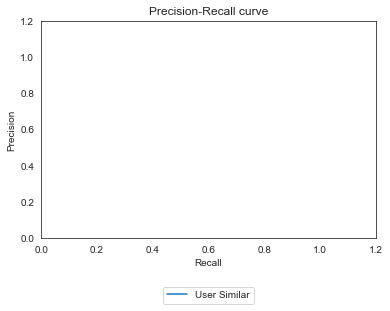

In [178]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.10

#Instantiate the precision_recall_calculator class
pr = Evaluation.evaluations(test_data, train_data, top_recomend(25496407))

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

print('AVG list prec '+str(pm_avg_precision_list))
print('avg list recal '+str(pm_avg_recall_list))

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "User Similar")

Plotting precision recall curves.


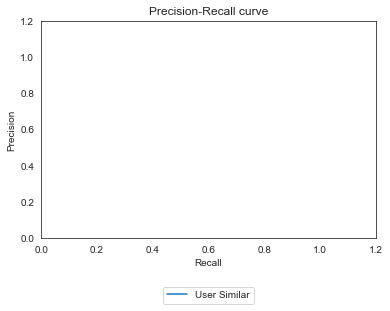

In [171]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "User Similar")